In [1]:
import torch
from src.preprocess import preprocess_dataset
from src.download_data import download_and_extract
from src.dataloader import get_data_loaders
from src.model import get_model
from src.train import training_loop, training_loop_with_eval

In [5]:
file_id = '1VTwHRCFLZnIB99YDIXQaGMbR9zjsqsRE'
file_small_id = '1iah2KPKUq-N8-bpPPHTdQCFkSIGPBS3y'
output_zip = 'dataset.zip'

download_and_extract(file_small_id, output_zip)

Downloading...
From: https://drive.google.com/uc?id=1iah2KPKUq-N8-bpPPHTdQCFkSIGPBS3y
To: c:\Users\Sebastian\Desktop\psi-projekt\dataset.zip
100%|██████████| 5.26M/5.26M [00:00<00:00, 24.6MB/s]


Dane pobrane i rozpakowane do folderu: dataset


In [6]:
zip_path = "dataset.zip"
output_dir = "dataset"
test_ratio = 0.1
val_ratio = 0.1
preprocess_dataset(zip_path,output_dir)


Raport dla zbioru: TRAIN
 - Liczba obrazów: 487
 - Liczba adnotacji: 472
 - Obrazów bez kategorii (sam background): 145
 - Kategorie: {1: 136, 2: 173, 3: 163}

Raport dla zbioru: VAL
 - Liczba obrazów: 61
 - Liczba adnotacji: 67
 - Obrazów bez kategorii (sam background): 18
 - Kategorie: {1: 17, 2: 23, 3: 27}

Raport dla zbioru: TEST
 - Liczba obrazów: 61
 - Liczba adnotacji: 62
 - Obrazów bez kategorii (sam background): 19
 - Kategorie: {1: 16, 2: 27, 3: 19}
Usunięto folder z oryginalnymi obrazami: dataset\dataset


In [ ]:
from src.run_all_experiments import run_all_experiments

run_all_experiments()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Epoch trained 0: 100%|██████████| 122/122 [01:48<00:00,  1.13it/s]


Epoch [0] Loss: 0.3173
Model saved: models/model1_fasterrcnn_epoch_1.pth
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Evaluation: 100%|██████████| 122/122 [02:56<00:00,  1.45s/it]


Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.37s).
Accumulating evaluation results...
DONE (t=0.13s).
[Train] mAP: 0.1943
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Evaluation: 100%|██████████| 16/16 [00:22<00:00,  1.39s/it]


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.04s).
[Val]   mAP: 0.1944


Epoch trained 1:  86%|████████▌ | 105/122 [01:38<00:15,  1.07it/s]


KeyboardInterrupt: 

In [2]:
from src.test import evaluate_mAP
train_loader, val_loader, test_loader = get_data_loaders()
model = get_model(4)
model.load_state_dict(torch.load("models/model1_fasterrcnn_epoch_1.pth"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
train_json = "dataset/train/train.json"
val_json = "dataset/val/val.json"
evaluate_mAP(model, val_loader, val_json) 


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


C:\Users\Sebastian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Sebastian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Evaluation: 100%|██████████| 16/16 [00:20<00:00,  1.30s/it]

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).


{'mAP': np.float64(0.21305731884926765),
 'mAP_50': np.float64(0.4016114025113637),
 'mAP_75': np.float64(0.20071326057057137),
 'mAP_small': np.float64(0.12643277771507064),
 'mAP_medium': np.float64(0.27229426203195306),
 'mAP_large': np.float64(0.5086101449802264),
 'AR_1': np.float64(0.2682422405355057),
 'AR_10': np.float64(0.39281045751633986),
 'AR_100': np.float64(0.4041899529538063),
 'AR_small': np.float64(0.2700793650793651),
 'AR_medium': np.float64(0.4833333333333333),
 'AR_large': np.float64(0.6555555555555556)}

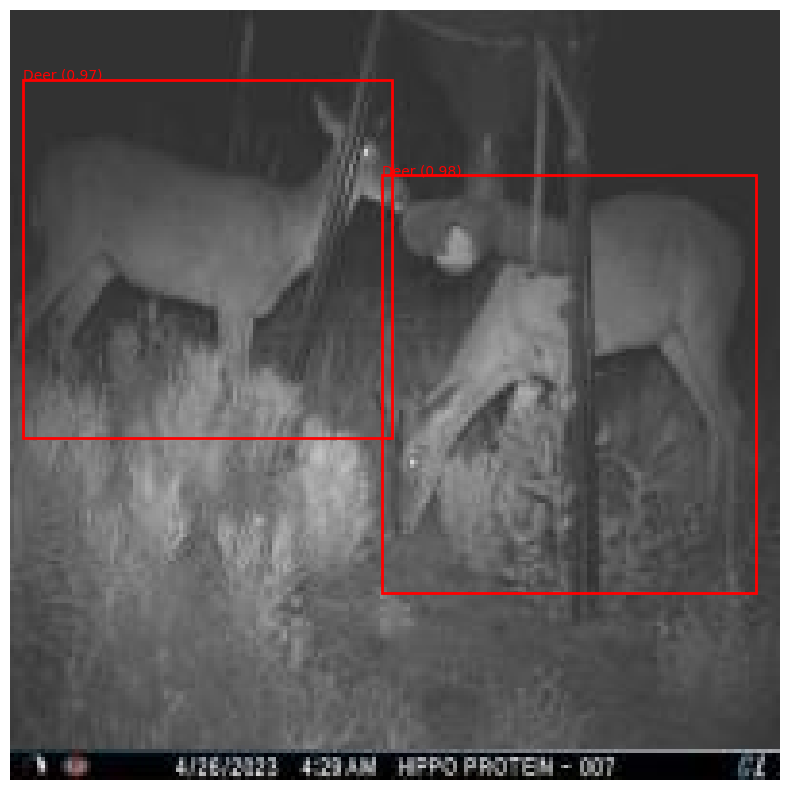

In [ ]:
import matplotlib.pyplot as plt 
import torchvision.transforms.functional as F
from PIL import Image
model = get_model(num_classes)
model.load_state_dict(torch.load("models/exp1_fasterrcnn_epoch_8.pth"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  

def prepare_image(image_path):
    image = Image.open(image_path).convert("RGB")  
    image_tensor = F.to_tensor(image).unsqueeze(0) 
    return image_tensor.to(device)

image_path = "img1.jpg"
image_tensor = prepare_image(image_path)

with torch.no_grad(): 
    prediction = model(image_tensor)

COCO_CLASSES = {0: "Background", 1: "Coyote", 2: "Deer", 3: "Hog"}

def get_class_name(class_id):
    return COCO_CLASSES.get(class_id, "Unknown")
    

def draw_boxes(image, prediction, fig_size=(10, 10)):
    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()

    threshold = 0.5
    detections_drawn = 0

    plt.figure(figsize=fig_size)
    plt.imshow(image)

    for box, label, score in zip(boxes, labels, scores):
        if score > threshold:
            x_min, y_min, x_max, y_max = box
            class_name = get_class_name(label)
            plt.gca().add_patch(plt.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                linewidth=2, edgecolor='r', facecolor='none'
            ))
            plt.text(x_min, y_min, f"{class_name} ({score:.2f})", color='r', fontsize=10)
            detections_drawn += 1

    if detections_drawn == 0:
        print("Nie wykryto żadnych obiektów")

    plt.axis('off')
    plt.show()
draw_boxes(Image.open(image_path), prediction, fig_size=(12, 10))  # Example of increased size

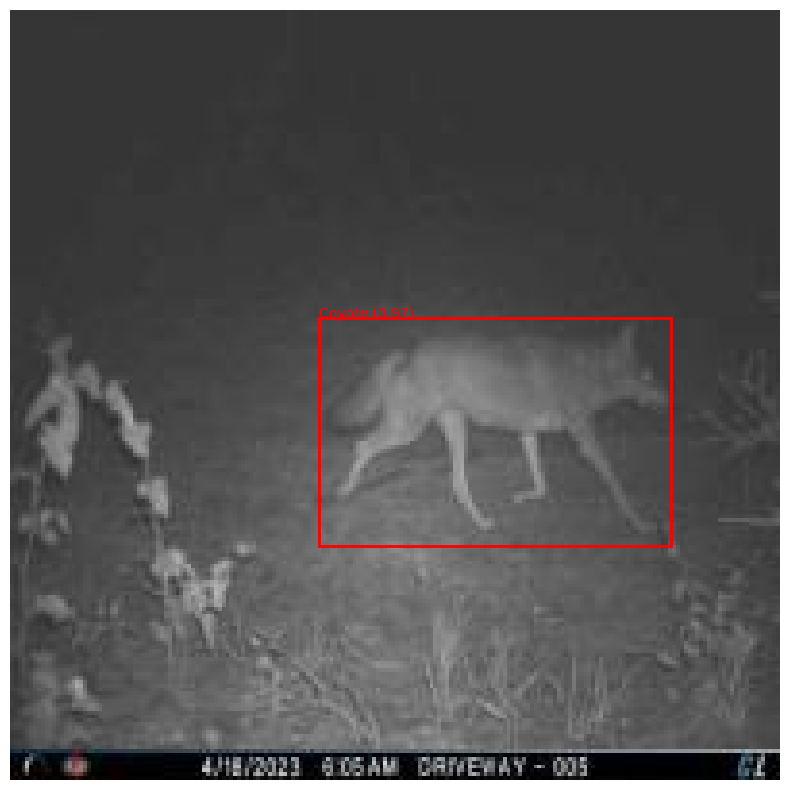

In [8]:
import matplotlib.pyplot as plt 
import torchvision.transforms.functional as F
from PIL import Image
model = get_model(5)
model.load_state_dict(torch.load("models/exp1_fasterrcnn_epoch_8.pth"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  

def prepare_image(image_path):
    image = Image.open(image_path).convert("RGB")  
    image_tensor = F.to_tensor(image).unsqueeze(0) 
    return image_tensor.to(device)




image_path = "img2.jpg"
image_tensor = prepare_image(image_path)

with torch.no_grad(): 
    prediction = model(image_tensor)

COCO_CLASSES = {0: "Background", 1: "Coyote", 2: "Deer", 3: "Hog", 4: "Racoon"}

def get_class_name(class_id):
    return COCO_CLASSES.get(class_id, "Unknown")
    

def draw_boxes(image, prediction, fig_size=(10, 10)):
    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()

    threshold = 0.5
    detections_drawn = 0

    plt.figure(figsize=fig_size)
    plt.imshow(image)

    for box, label, score in zip(boxes, labels, scores):
        if score > threshold:
            x_min, y_min, x_max, y_max = box
            class_name = get_class_name(label)
            plt.gca().add_patch(plt.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                linewidth=2, edgecolor='r', facecolor='none'
            ))
            plt.text(x_min, y_min, f"{class_name} ({score:.2f})", color='r', fontsize=10)
            detections_drawn += 1

    if detections_drawn == 0:
        print("Nie wykryto żadnych obiektów")

    plt.axis('off')
    plt.show()
draw_boxes(Image.open(image_path), prediction, fig_size=(12, 10))  # Example of increased size